In [1]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def compare_results(lstm_df, ann_df):
    # You might want to merge or concatenate dfs for comparison, or compare them side-by-side
    # For simplicity, let's just print out the head of each DataFrame here
    print("LSTM Model Results:")
    print(lstm_df.head())
    print("\nANN Model Results:")
    print(ann_df.head())

In [19]:
def analyze_performance(ann_results, lstm_results):
    """
    Analyze and compare the performance of ANN and LSTM models.
    
    Parameters:
    - ann_results: DataFrame containing ANN model results.
    - lstm_results: DataFrame containing LSTM model results.
    
    Returns:
    - DataFrame with comparison results including differences in metrics.
    """
    comparison_df = pd.merge(ann_results, lstm_results, on="Feature Set", suffixes=('_ANN', '_LSTM'))
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
        comparison_df[f'{metric}_Diff'] = comparison_df[f'{metric}_LSTM'] - comparison_df[f'{metric}_ANN']
    return comparison_df.sort_values(by='Accuracy_Diff', ascending=False)

def visualize_performance(comparison_df):
    """
    Visualize the performance comparison between ANN and LSTM models.
    
    Parameters:
    - comparison_df: DataFrame with the comparison results.
    """
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    axes = axes.flatten()

    for i, metric in enumerate(metrics):
        sns.barplot(x=f'{metric}_Diff', y='Feature Set', data=comparison_df, ax=axes[i])
        axes[i].set_title(f'Difference in {metric} between LSTM and ANN')
        axes[i].set_xlabel(f'{metric} Difference')
        axes[i].set_ylabel('Feature Set')
    
    plt.tight_layout()
    plt.show()

In [3]:
def feature_set_impact_analysis(results_df):
    # Group by feature set and calculate mean performance metrics
    grouped_df = results_df.groupby('Feature Set').mean().reset_index()

    # Sort by accuracy or another metric of interest
    sorted_df = grouped_df.sort_values(by='Accuracy', ascending=False)

    print("Feature Set Impact on Model Performance:")
    print(sorted_df[['Feature Set', 'Accuracy', 'Precision', 'Recall', 'F1']])


In [5]:
def plot_comparisons(lstm_df, ann_df):
    plt.figure(figsize=(10, 6))
    
    # Assuming 'Feature Set' is a column in your DataFrame
    # and 'Accuracy' is the metric you want to compare
    plt.plot(lstm_df['Feature Set'], lstm_df['Accuracy'], label='LSTM', marker='o')
    plt.plot(ann_df['Feature Set'], ann_df['Accuracy'], label='ANN', marker='x')
    
    plt.xlabel('Feature Set')
    plt.ylabel('Accuracy')
    plt.title('Model Comparison by Accuracy')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
def plot_metric_comparisons(lstm_df, ann_df, metric='Accuracy'):
    plt.figure(figsize=(12, 8))
    
    # Plotting
    plt.plot(lstm_df['Feature Set'], lstm_df[metric], label='LSTM', marker='o')
    plt.plot(ann_df['Feature Set'], ann_df[metric], label='ANN', marker='x')

    # Customization
    plt.xlabel('Feature Set', fontsize=14)
    plt.ylabel(metric, fontsize=14)
    plt.title(f'Model Comparison by {metric}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12)
    plt.tight_layout()

    plt.show()


LSTM Model Results:
  Feature Set  Accuracy  Precision    Recall        F1
0        mfcc  0.966071   0.966640  0.966071  0.966037
1        lpcc  0.867857   0.870875  0.867857  0.868100
2        lfpc  0.941071   0.942233  0.941071  0.940469
3        gfcc  0.948214   0.949245  0.948214  0.948428
4    formants  0.914286   0.914271  0.914286  0.914051

ANN Model Results:
  Feature Set  Accuracy  Precision    Recall        F1
0        mfcc  0.958929   0.960521  0.958929  0.958860
1        lpcc  0.805357   0.816941  0.805357  0.805092
2        lfpc  0.935714   0.935897  0.935714  0.934442
3        gfcc  0.953571   0.954900  0.953571  0.953746
4    formants  0.896429   0.896439  0.896429  0.895996


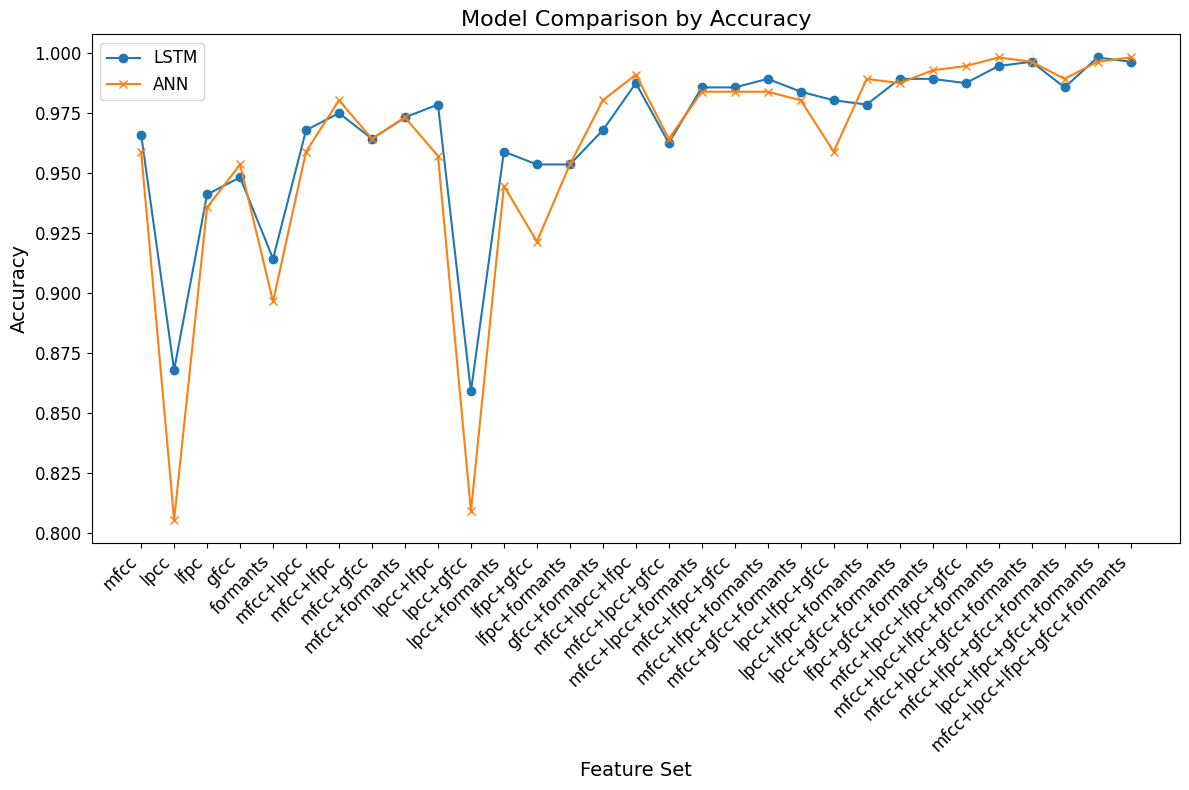

In [24]:
# Load acoustic results
lstm_acoustic_results = pd.read_csv('lstm_acoustic_model_results.csv')
ann_acoustic_results = pd.read_csv('ann_acoustic_model_results.csv')
compare_results(lstm_acoustic_results, ann_acoustic_results)
plot_metric_comparisons(lstm_acoustic_results, ann_acoustic_results)

LSTM Model Results:
                                         Feature Set  Accuracy  Precision  \
0  mean_pitch+speech_rate+duration+voiced_duratio...  0.633929   0.630209   
1               mean_pitch+std_pitch+pitch_variation  0.408929   0.408231   
2  speech_rate+silence_duration+voiced_duration+u...  0.700000   0.706877   
3  mean_pitch+std_pitch+mean_energy+std_energy+du...  0.864286   0.867586   

     Recall        F1  
0  0.633929  0.628755  
1  0.408929  0.404617  
2  0.700000  0.697310  
3  0.864286  0.865375  

ANN Model Results:
                                         Feature Set  Accuracy  Precision  \
0                    mean_pitch+speech_rate+duration  0.492857   0.504272   
1               mean_pitch+std_pitch+pitch_variation  0.414286   0.407249   
2  speech_rate+silence_duration+voiced_duration+u...  0.687500   0.694015   
3  mean_pitch+std_pitch+mean_energy+std_energy+du...  0.826786   0.836401   

     Recall        F1  
0  0.492857  0.464037  
1  0.414286  0.40679

/var/folders/5p/8zb7yfmj03s80hffq10x1h800000gn/T/ipykernel_34449/3300990953.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


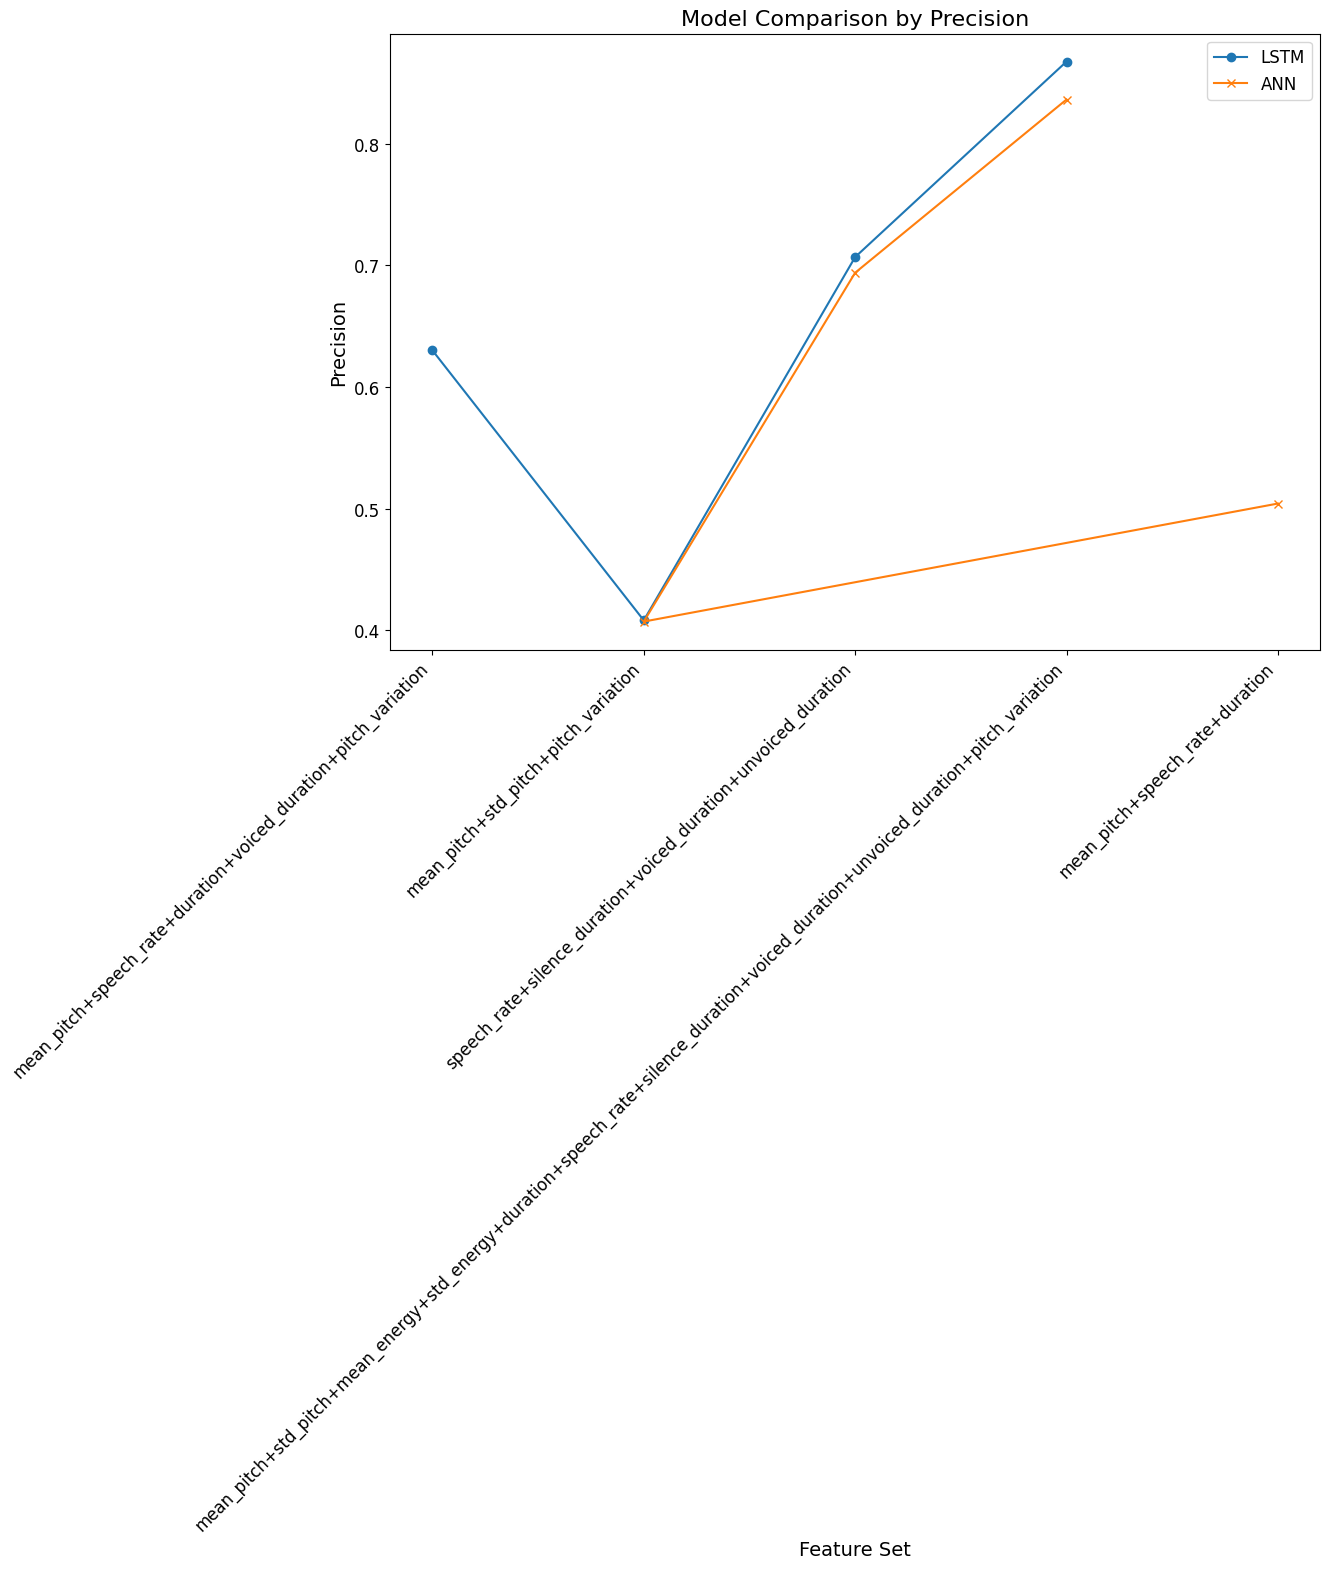

In [18]:
# Load acoustic results
lstm_prosodic_results = pd.read_csv('lstm_prosodic_model_results.csv')
ann_prosodic_results = pd.read_csv('ann_prosodic_model_results.csv')
compare_results(lstm_prosodic_results, ann_prosodic_results)
plot_metric_comparisons(lstm_prosodic_results, ann_prosodic_results, 'Precision')

/var/folders/5p/8zb7yfmj03s80hffq10x1h800000gn/T/ipykernel_34449/1261722571.py:34: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


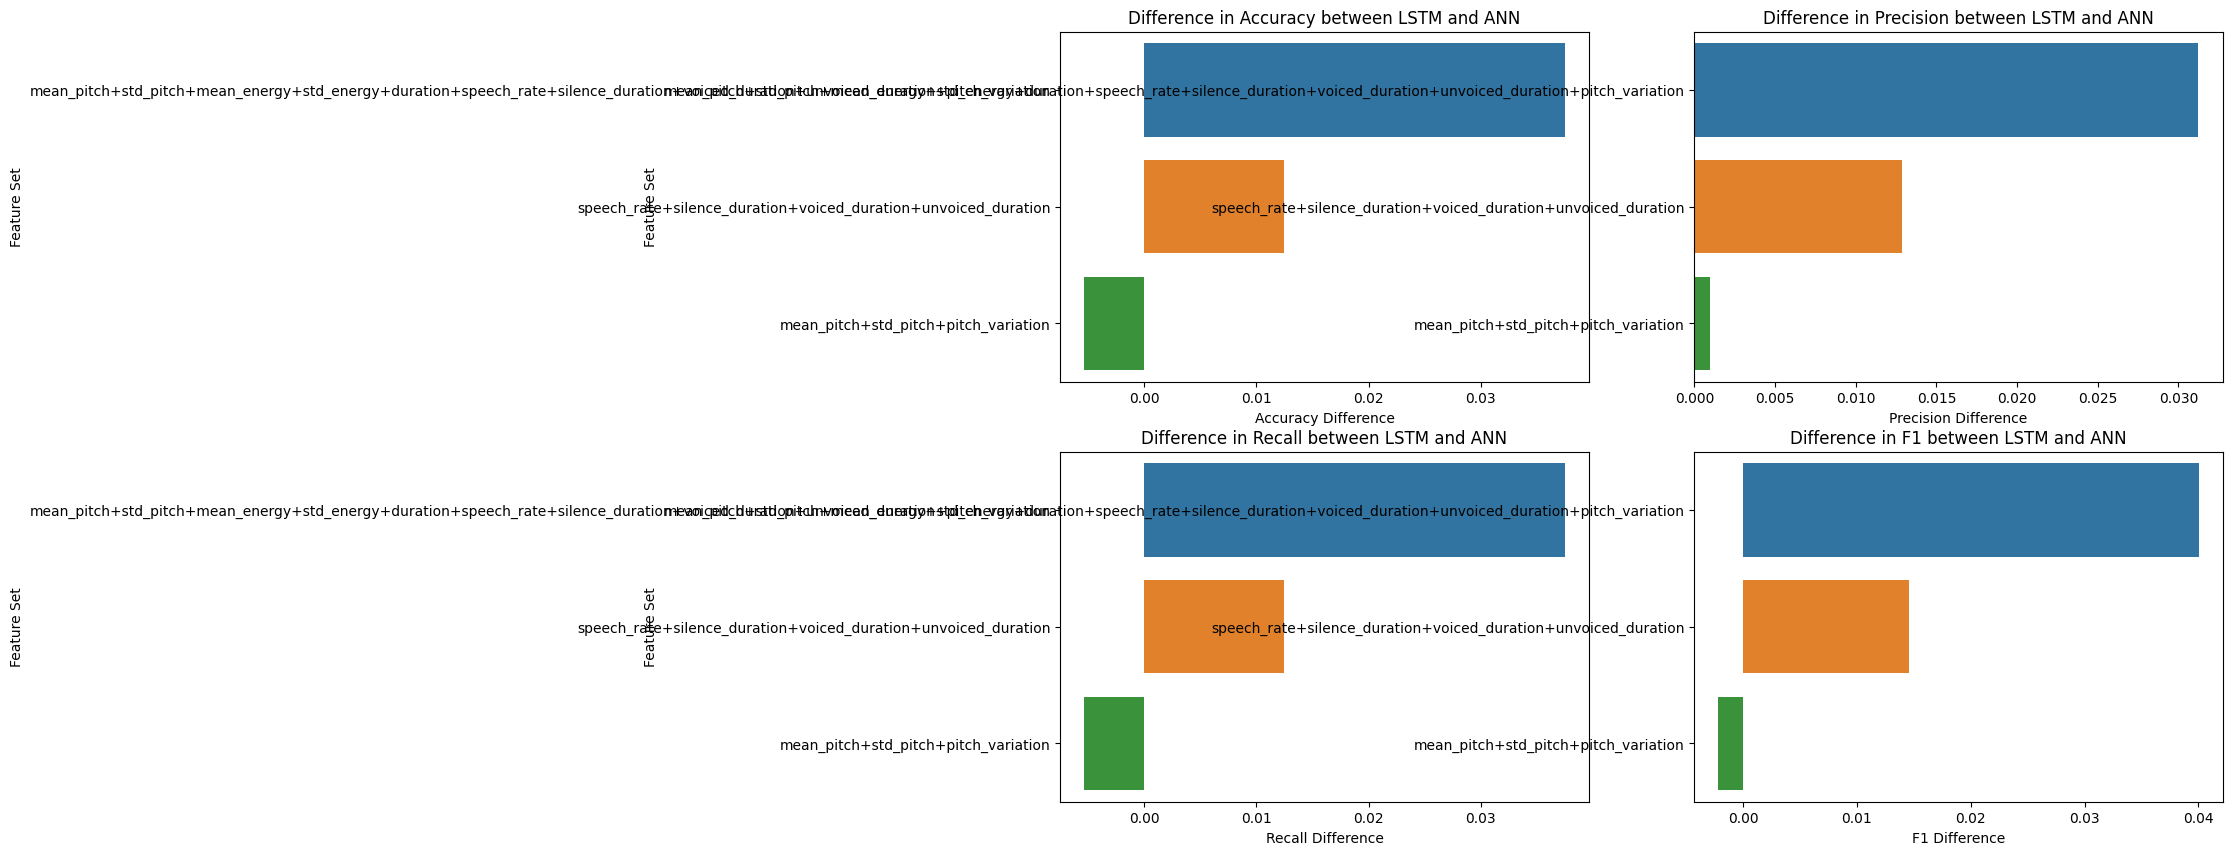

In [20]:
lstm_prosodic_results = pd.read_csv('lstm_prosodic_model_results.csv')
ann_prosodic_results = pd.read_csv('ann_prosodic_model_results.csv')
# Analyze the performance
comparison_df = analyze_performance(ann_prosodic_results, lstm_prosodic_results)

# Visualize the performance comparison
visualize_performance(comparison_df)

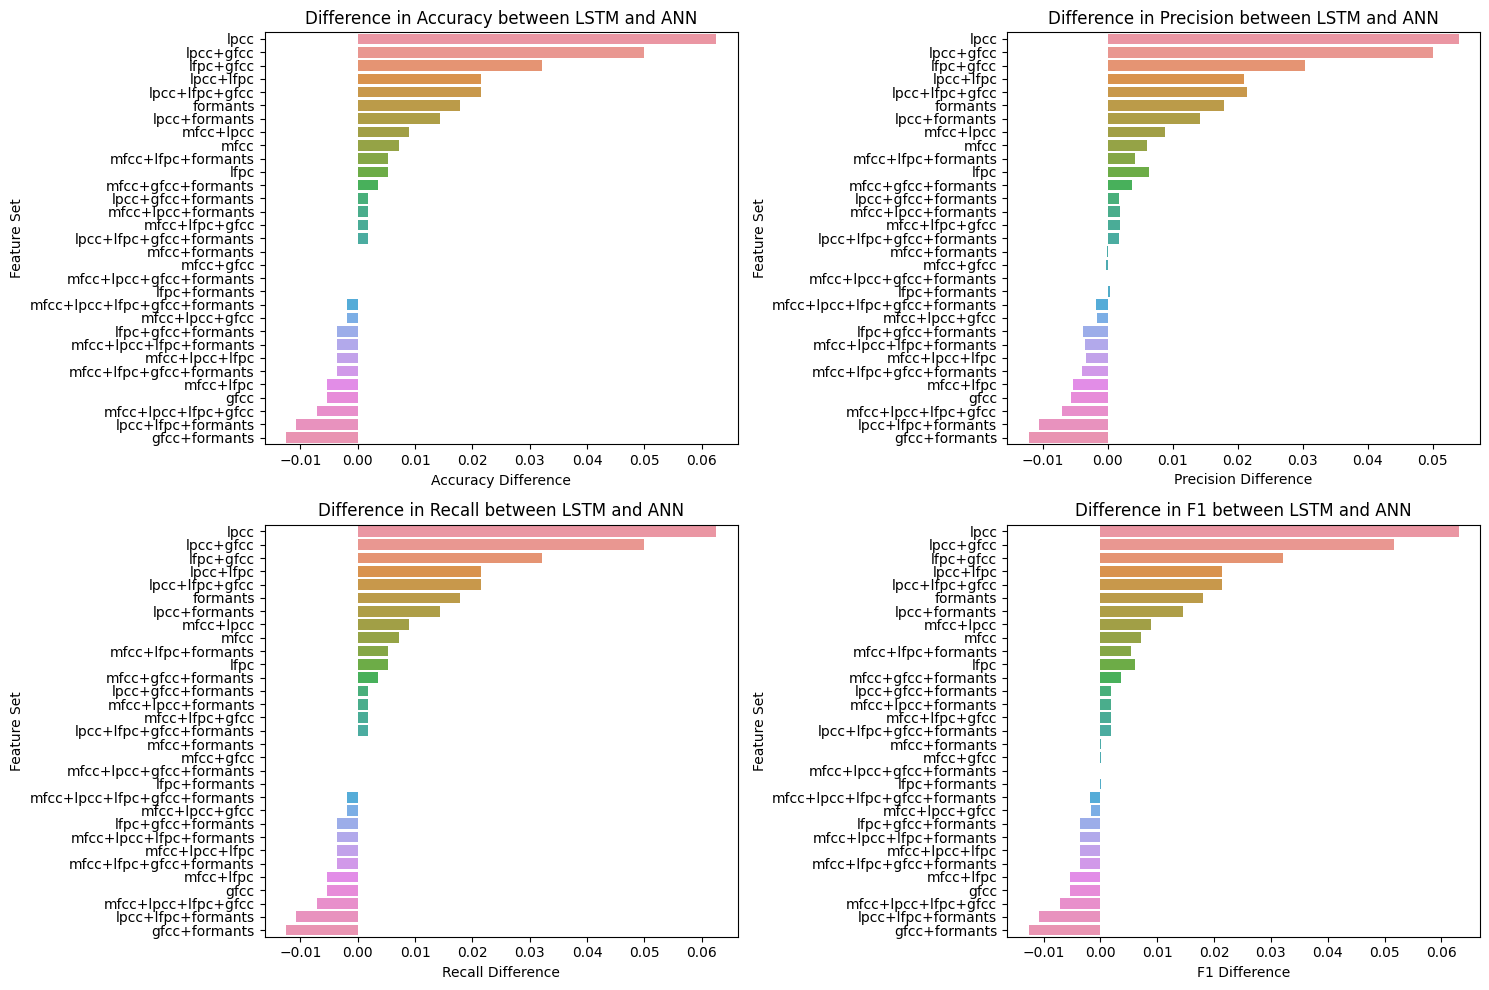

In [25]:
# Load acoustic results
lstm_acoustic_results = pd.read_csv('lstm_acoustic_model_results.csv')
ann_acoustic_results = pd.read_csv('ann_acoustic_model_results.csv')

comparison_df = analyze_performance(ann_acoustic_results, lstm_acoustic_results)
visualize_performance(comparison_df)